In [38]:
import base64
import struct
import matplotlib.pyplot as plt
import pandas as pd
f = open("hrmlog_text.txt")
lines = f.readlines()
hrmraw = lines[2]

data = base64.b64decode(hrmraw.split(":")[1])
data = list(struct.iter_unpack(">Ihhhh",data))
df = pd.DataFrame(data,columns=["time","ppg","x","y","z"])

<Axes: >

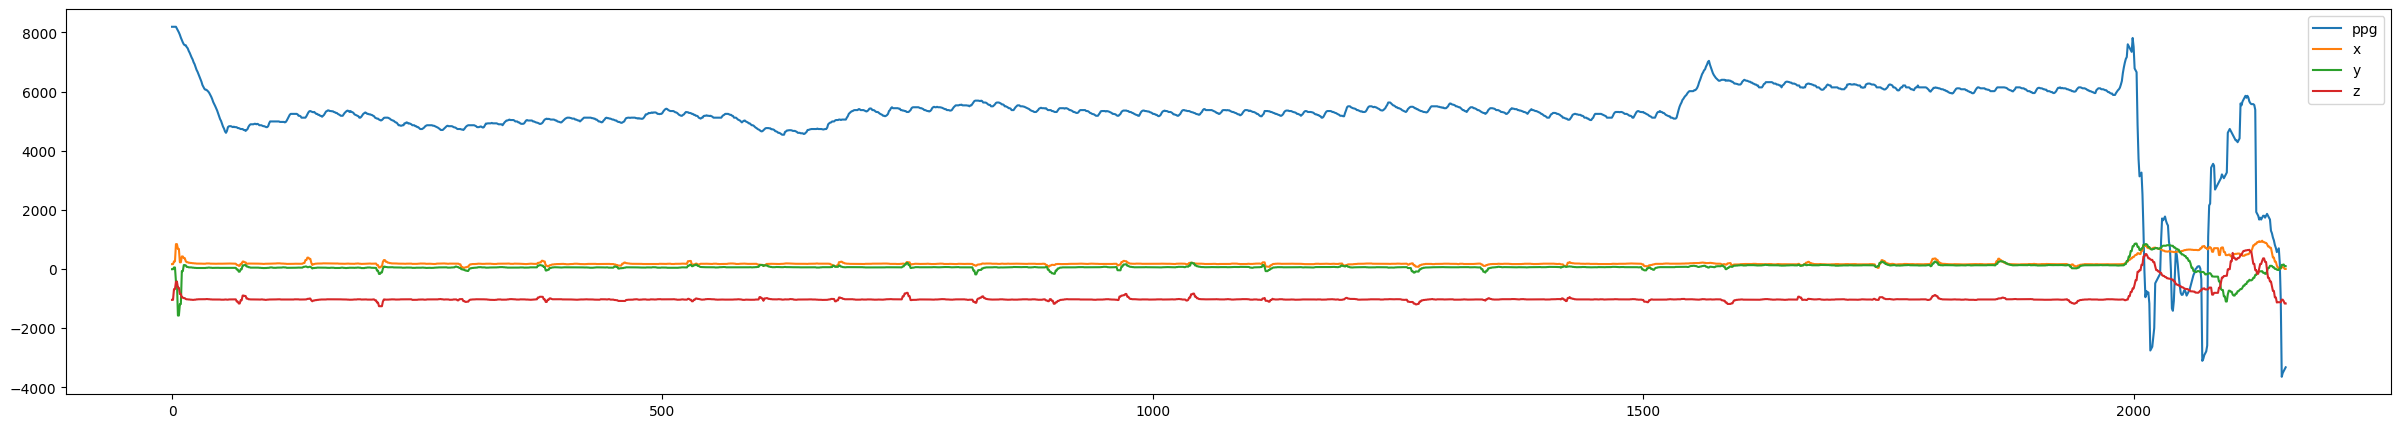

In [39]:
df[["ppg","x","y","z"]].plot(figsize=(30,5))

(1693311150,)

In [146]:
#simple grab

import sqlite3
import pandas as pd
import struct
import binascii;
import datetime
with sqlite3.connect("app.db") as con:
    res = con.execute("select uuid, hex(data) from data_sync where complete=1 order by dt desc")
    all_data = res.fetchall()
    for t in all_data[0:5]:
        print(t)
    




('24fd6648e46d49ab9ca4a4a5f852e367', '6865616C74686C6F6732333A64F526A0000000C464F526AC000000C40A68726D6C6F6732333A')
('8e625c5360b34ed9873a462bd7572928', '6865616C74686C6F6732333A64F52661000000CB64F52670000000CC0A68726D6C6F6732333A')
('4ddb6e5188ac43cab59dbc612ed030a5', '6865616C74686C6F6732333A64F52623000000DD64F52634000000E80A68726D6C6F6732333A')
('af3d3de487c041f0949ca48a0eefe7db', '6865616C74686C6F6732333A64F525E2000000B064F525F8000000B00A68726D6C6F6732333A64F525FC590064F525FC700064F525FD6B0064F525FE690064F525FE650064F5250BFE610064F526005D0064F5260B0C5D0064F5260B0C5D0064F5260B0D5D0064F5260B0D5D0064F5260B0D5D0064F52603640064F52604640064F526046E0064F52604740064F526057E0064F526057A0064F52606790064F52607780064F52608780064F52608780064F52609790064F526097F0064F5260B0F7A0064F5260B0F7A0064F5260B0F7A0064F5260B0B790064F5260B0B760064F5260C760064F5260D6F0864F5260E690064F5260F630964F52610660064F52610660064F52611640064F52612620064F52613610064F52614630064F52614600064F526155C0F64F52616560064F526175

config36 2 b'{}'
healthlog36 19 [(1693866822, 0, 256, 0), (1693866840, 0, 244, 0), (1693866900, 0, 227, 0), (1693866960, 0, 200, 0), (1693867020, 0, 205, 0), (1693867080, 0, 200, 0), (1693867140, 0, 186, 0), (1693867200, 0, 60, 0), (1693867260, 8, 272, 0), (1693867320, 0, 234, 0), (1693867380, 0, 243, 0), (1693867440, 0, 239, 0), (1693867500, 0, 238, 0), (1693867560, 0, 239, 0), (1693867620, 0, 239, 0), (1693867680, 0, 227, 0), (1693867740, 0, 225, 0), (1693867800, 0, 30, 0), (1693867860, 0, 146, 0)]
accellog36 18 [(1693866822, 66, 1, 66, 0), (1693866883, 14359, 733, 7848, 0), (1693866944, 6641, 742, 3422, 0), (1693867005, 20202, 741, 9037, 0), (1693867066, 15641, 742, 8022, 0), (1693867127, 7218, 743, 3930, 0), (1693867188, 4271, 742, 2074, 0), (1693867249, 10792, 743, 5433, 0), (1693867310, 26378, 743, 14075, 0), (1693867371, 22546, 681, 13551, 0), (1693867432, 16982, 581, 9426, 0), (1693867493, 18929, 631, 10497, 0), (1693867554, 23910, 741, 11020, 0), (1693867615, 21800, 744, 9595,

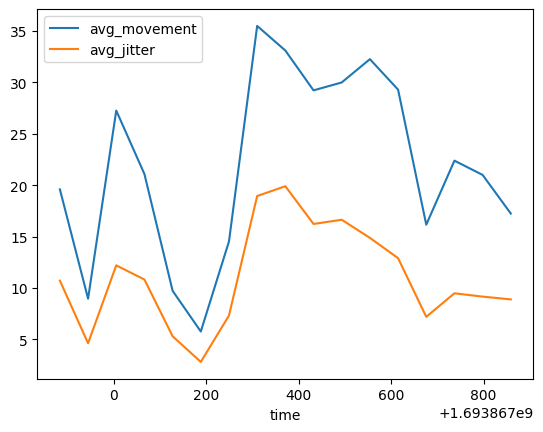

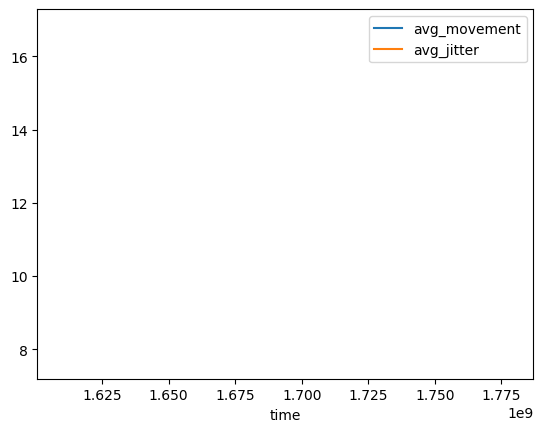

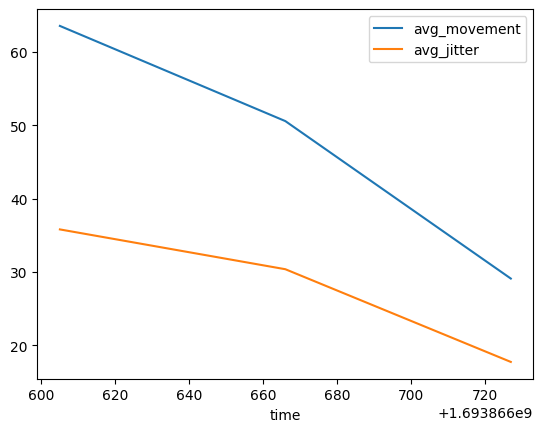

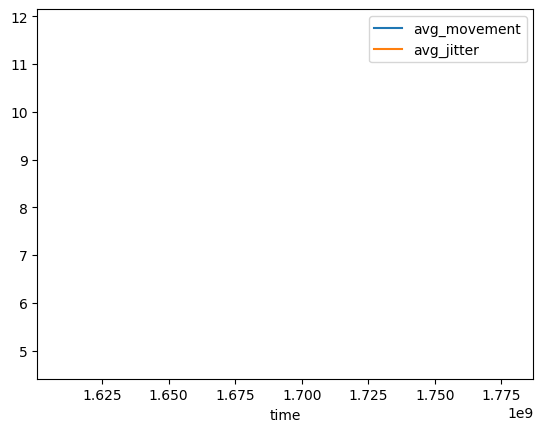

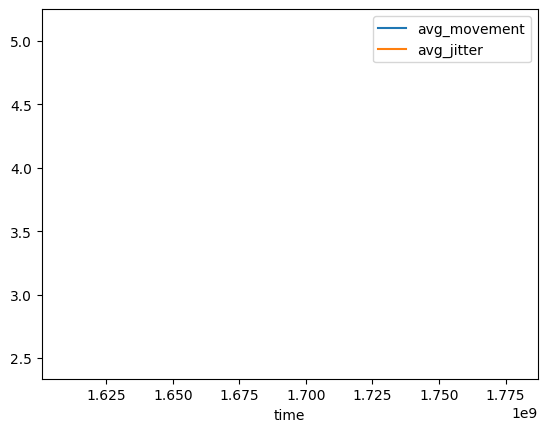

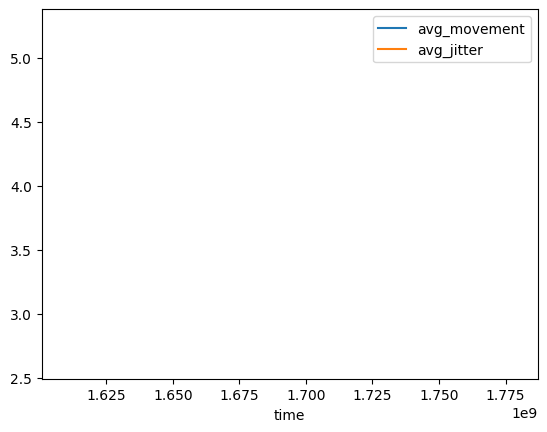

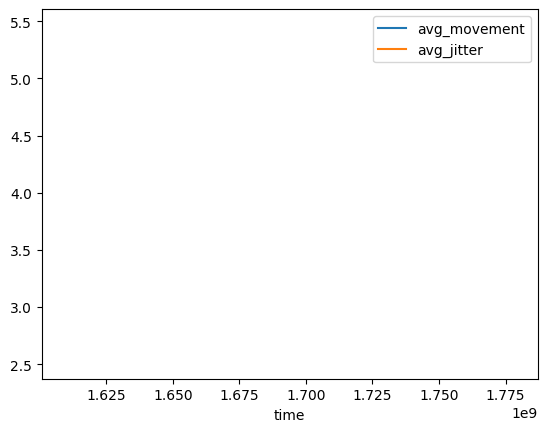

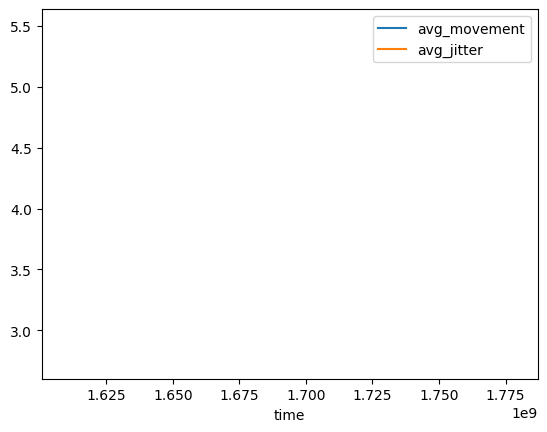

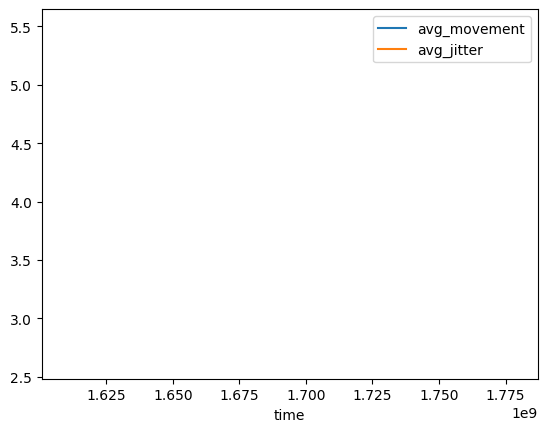

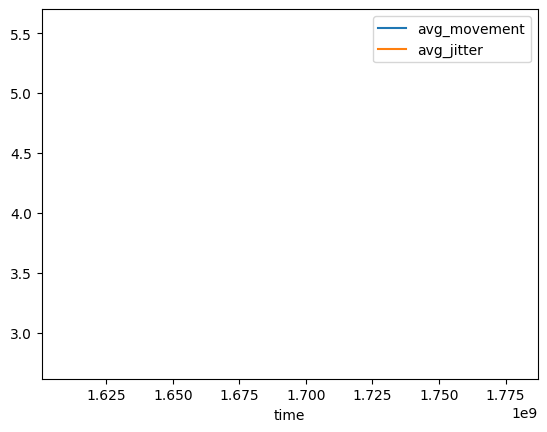

In [2]:
# check data

import sqlite3
import pandas as pd
import struct
import binascii;
import datetime
import base64
with sqlite3.connect("app.db") as con:
    res = con.execute("select uuid, hex(data) from data_sync where complete=1 order by dt desc")
    all_data = res.fetchall()
    for t in all_data[0:10]:
        files = bytearray.fromhex(t[1]).decode().split("\n")
        for f in files:
            parts = f.split(":")
            filename = parts[0]
            data = base64.b64decode(parts[1])
            if "hrmraw36" in filename:
                data = list(struct.iter_unpack(">HB",data))
                df_raw = pd.DataFrame(data,columns=["value","time_delta"]) 
            elif "hrmreg36" in filename:
                data = list(struct.iter_unpack(">IBB",data))
                df_reg = pd.DataFrame(data,columns=["time","bpm","conf"])
            elif "healthlog36" in filename:
                data = list(struct.iter_unpack(">IHHB",data))
            elif "accellog36" in filename:
                data = list(struct.iter_unpack(">IIIIH",data))
                df_acc = pd.DataFrame(data,columns=["time","movement","samples","jitter","padding"])
                df_acc["avg_movement"] = df_acc.movement/df_acc.samples
                df_acc["avg_jitter"] = df_acc.jitter/df_acc.samples
                df_acc[df_acc.samples > 5].plot(x="time",y=["avg_movement","avg_jitter"])
            print(filename, len(data), data)
            
        print()

        

here


,timestamp,steps,movement,notused
0,1693860518,0,602,0
1,1693860534,0,588,0
2,1693860540,0,583,0
3,1693860600,7,836,0
4,1693860660,8,965,0
5,1693860720,23,871,0
6,1693860780,0,619,0
7,1693860840,0,515,0
8,1693860900,0,449,0
9,1693860960,0,388,0


<Axes: xlabel='date'>

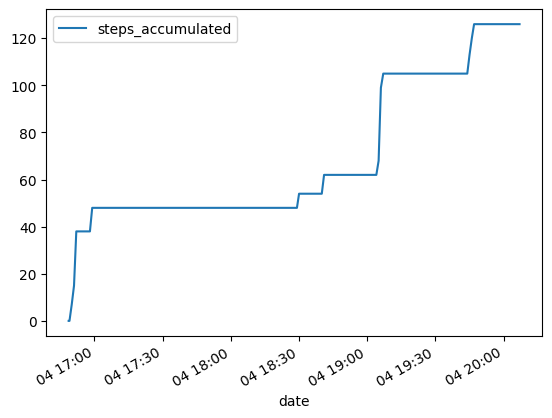

In [63]:
# let's extract all of the data and grab a clean table of steps taken

import sqlite3
import pandas as pd
import struct
import binascii;
import datetime
import base64
full_data = []
print("here")
with sqlite3.connect("app.db") as con:
    res = con.execute("select uuid, hex(data) from data_sync where complete=1 order by dt asc")
    all_data = res.fetchall()
    
    for t in all_data:

        files = bytearray.fromhex(t[1]).decode().split("\n")
        for f in files:
            parts = f.split(":")
            filename = parts[0]
            data = base64.b64decode(parts[1])
            if "healthlog" in filename:
                data = list(struct.iter_unpack(">IHHB",data))
                full_data.extend(data)
            
df = pd.DataFrame(full_data,columns=["timestamp", "steps", "movement", "notused"])
display(df.head(20))
df["movement_accumulated"] = df.movement.cumsum()

df["date"] = df.timestamp.apply(datetime.datetime.fromtimestamp)
df["steps_accumulated"] = df.steps.cumsum()
df.plot(x="date",y="steps_accumulated")

        


In [106]:
import pandas as pd
import sqlite3
import datetime
import base64
import struct
target_day = "9/5/2023"
dt = datetime.datetime.strptime(target_day, "%m/%d/%Y")

with sqlite3.connect("app.db") as con:
    df = pd.read_sql("select from_time,dt,hex(data) as data_hex from data_sync",con)
    df["data"] = df.data_hex.apply(bytearray.fromhex).apply(bytearray.decode)
    df["stepdata_encoded"] = df["data"].str.extract("healthlog[0-9]*:(.*)\n")
    df["stepdata"] = df.stepdata_encoded.apply(base64.b64decode)
    df["stepdata_unpacked"] = df.stepdata.apply(lambda x: list(struct.iter_unpack(">IHHB",x)))
    df = df.explode("stepdata_unpacked")
    df['step_data_movement'] = df.stepdata_unpacked.apply(lambda x: x[2]) - 60
    df['step_data_steps'] = df.stepdata_unpacked.apply(lambda x: x[1])
    df['step_data_timestamp'] = df.stepdata_unpacked.apply(lambda x: x[0])
    df['dt'] = df.step_data_timestamp.apply(datetime.datetime.fromtimestamp)
    df['date'] = df.dt.dt.date
    df['hour'] = df.dt.dt.hour
    df['minute'] = df.dt.dt.minute
    df = df[["dt", "date","hour","minute","step_data_steps","step_data_movement"]]
    #df = df[["dt","from_time","stepdata"]]
#df.to_excel('test.xlsx')

df[(df.date == datetime.date(2023,9,6)) & (df.hour >= 0) & (df.hour <= 24) & (df.step_data_movement < 400)].plot(x="dt",y="step_data_movement",figsize=(20,5))

SyntaxError: '[' was never closed (2528674794.py, line 26)

<Axes: >

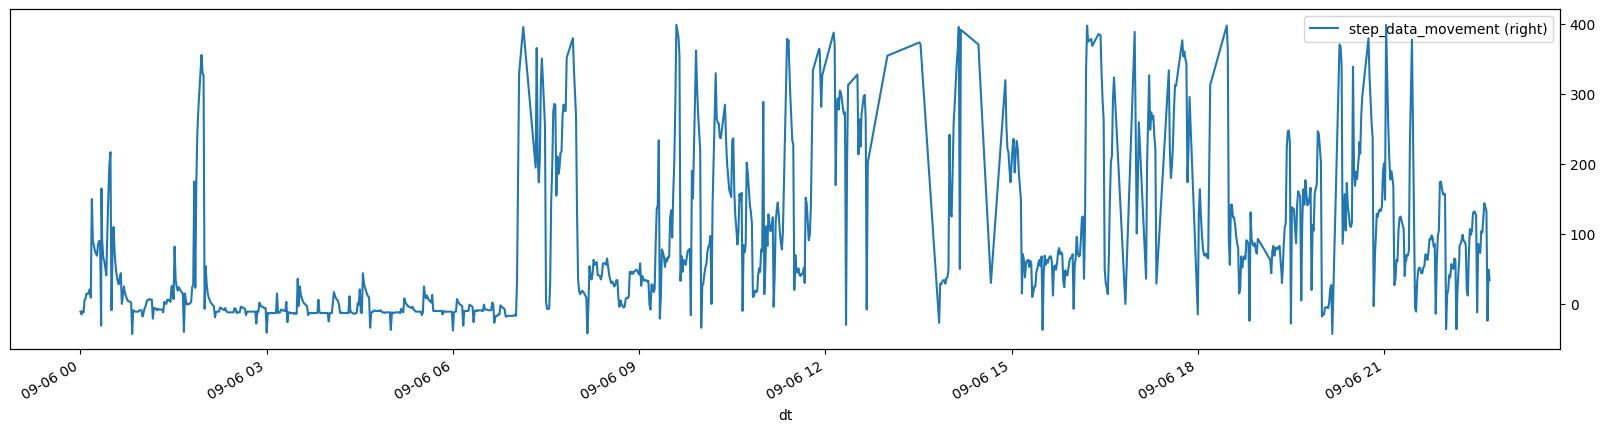

In [128]:
#this example shows how to use the bangle api to get syncs and turn them into something useful using pandas
import pandas as pd
import requests
import datetime
import base64
import struct
import json
import math
import matplotlib.pyplot as plt
from_time = math.floor((datetime.datetime.now()-datetime.timedelta(days=1)).timestamp())
dt = datetime.datetime.strptime(target_day, "%m/%d/%Y")
res = requests.get(f"https://bbs.ugavel.com/getsyncs?device_id=e5:cc:1d:bb:e4:d1&from_time={from_time}")
df = pd.DataFrame.from_records(res.json()["syncs"])

df["stepdata_encoded"] = df["data"].str.extract("healthlog[0-9]*:(.*)\n")
df["stepdata"] = df.stepdata_encoded.apply(base64.b64decode)
df["stepdata_unpacked"] = df.stepdata.apply(lambda x: list(struct.iter_unpack(">IHHB",x)))
df = df.explode("stepdata_unpacked")
df['step_data_movement'] = df.stepdata_unpacked.apply(lambda x: x[2]) - 60
df['step_data_steps'] = df.stepdata_unpacked.apply(lambda x: x[1])
df['step_data_timestamp'] = df.stepdata_unpacked.apply(lambda x: x[0])
df['dt'] = df.step_data_timestamp.apply(datetime.datetime.fromtimestamp)
df['date'] = df.dt.dt.date
df['hour'] = df.dt.dt.hour
df['minute'] = df.dt.dt.minute
df = df[["dt", "date","hour","minute","step_data_steps","step_data_movement"]]
fig,ax = plt.subplots(figsize=(20,5))
#df[(df.date == datetime.date(2023,9,6))].plot(x="dt",y="step_data_steps",figsize=(20,5), ax = ax)
df[(df.date == datetime.date(2023,9,6)) & (df.hour >= 0) & (df.hour <= 24) & (df.step_data_movement < 400)].plot(x="dt",y="step_data_movement",secondary_y=True, ax = ax)

<Axes: xlabel='dt'>

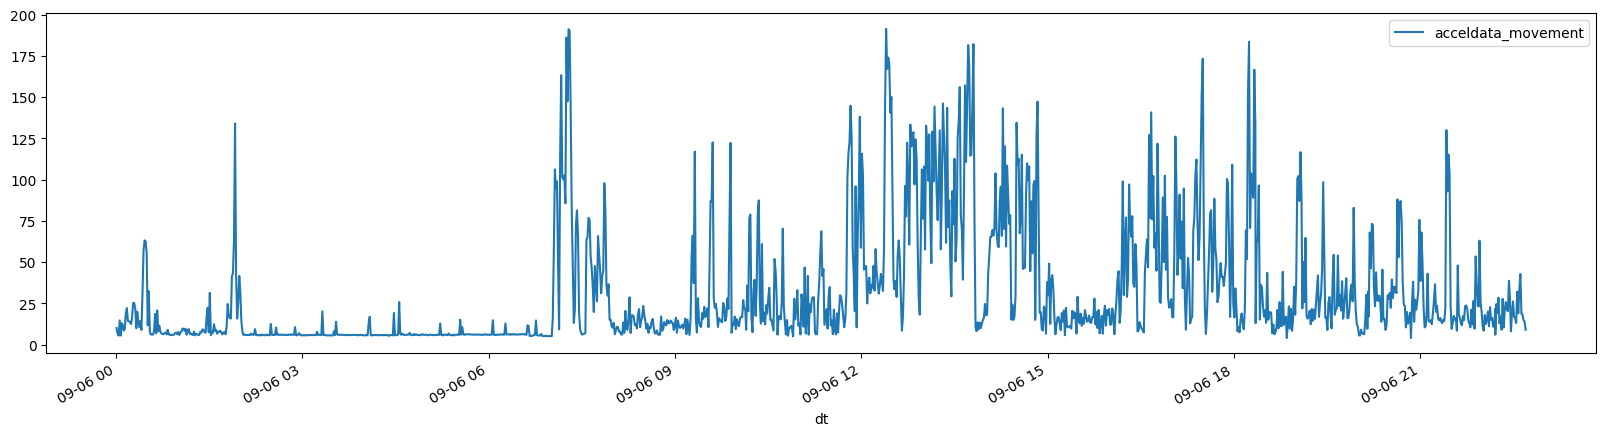

In [127]:
#this example shows how to use the bangle api to get syncs and turn them into something useful using pandas
import pandas as pd
import requests
import datetime
import base64
import struct
import json
import math
import matplotlib.pyplot as plt
from_time = math.floor((datetime.datetime.now()-datetime.timedelta(days=1)).timestamp())
dt = datetime.datetime.strptime(target_day, "%m/%d/%Y")
res = requests.get(f"https://bbs.ugavel.com/getsyncs?device_id=e5:cc:1d:bb:e4:d1&from_time={from_time}")
df = pd.DataFrame.from_records(res.json()["syncs"])

df["acceldata_encoded"] = df["data"].str.extract("accellog[0-9]*:(.*)\n?")
df["acceldata"] = df.acceldata_encoded.apply(base64.b64decode)
df["acceldata_unpacked"] = df.acceldata.apply(lambda x: list(struct.iter_unpack(">IIIIH",x)))
df = df.explode("acceldata_unpacked")
df['acceldata_movement'] = df.acceldata_unpacked.apply(lambda x: x[1]/x[2])
df['accel_data_timestamp'] = df.acceldata_unpacked.apply(lambda x: x[0])
df['dt'] = df.accel_data_timestamp.apply(datetime.datetime.fromtimestamp)
df['date'] = df.dt.dt.date
df['hour'] = df.dt.dt.hour
df['minute'] = df.dt.dt.minute
df = df[["dt", "date","hour","minute","acceldata_movement"]]
fig,ax = plt.subplots(figsize=(20,5))
df[(df.date == datetime.date(2023,9,6))].plot(x="dt",y="acceldata_movement",figsize=(20,5), ax = ax)
